In [72]:
import numpy as np
import sympy as sy
import control.matlab as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
s,z,h = sy.symbols('s, z, h')

In [6]:
Y = (s+1)/(s*s*(s+3))
sy.apart(Y)

-2/(9*(s + 3)) + 2/(9*s) + 1/(3*s**2)

In [24]:
H = sy.Integer(2)/sy.Integer(9) + h/(3*(z-1)) - 2*(z-1)/(9*(z-sy.exp(-3*h)))
print H

h/(3*z - 3) - (2*z - 2)/(9*z - 9*exp(-3*h)) + 2/9


In [25]:
H = sy.together(H)
print H

(3*h*(z*exp(3*h) - 1) - 2*(z - 1)**2*exp(3*h) + 2*(z - 1)*(z*exp(3*h) - 1))/(9*(z - 1)*(z*exp(3*h) - 1))


In [26]:
(B,A) = sy.fraction(H)
print B

3*h*(z*exp(3*h) - 1) - 2*(z - 1)**2*exp(3*h) + 2*(z - 1)*(z*exp(3*h) - 1)


In [27]:
sy.simplify(B - sy.exp(3*h)*(2*(z-1)*(z-sy.exp(-3*h)) + 3*h*(z-sy.exp(-3*h)) - 2*(z-1)**2))

0

In [29]:
np.log(2)/3

0.23104906018664842

In [33]:
Hc = sy.simplify(H/(H+1))
print Hc

(3*h*(z*exp(3*h) - 1) - 2*(z - 1)**2*exp(3*h) + 2*(z - 1)*(z*exp(3*h) - 1))/(3*h*(z*exp(3*h) - 1) - 2*(z - 1)**2*exp(3*h) + 11*(z - 1)*(z*exp(3*h) - 1))


In [39]:
Hc1 = Hc.subs(h, sy.log(2)/3)
(Bc,Ac) = sy.fraction(Hc1)
print sy.collect(sy.expand(Ac), z)

18*z**2 + z*(-25 + 2*log(2)) - log(2) + 7


In [43]:
sy.simplify(sy.expand( (11*z-11 +sy.log(2))*(z-0.5)-2*(z-1)**2) )

9*z**2 - 12.5*z + z*log(2) - 0.5*log(2) + 3.5

In [42]:
sy.simplify(sy.expand( A + B)).subs(h, sy.log(2)/3)

18*z**2 - 25*z + 2*z*log(2) - log(2) + 7

In [44]:
12.5-np.log(2)

11.806852819440055

In [45]:
3.5-np.log(2)/2

3.1534264097200273

Poly((2*log(2) + 2)*z - 2 - log(2), z, domain='EX')
[2*log(2) + 2, -2 - log(2)]
Poly(18*z**2 + (-25 + 2*log(2))*z - log(2) + 7, z, domain='EX')
[18, -25 + 2*log(2), -log(2) + 7]
[18.0, -23.61370563888011, 6.306852819440055]
[3.386294361119891, -2.6931471805599454]

     3.386 z - 2.693
------------------------
18 z^2 - 23.61 z + 6.307

dt = 0.231049060187



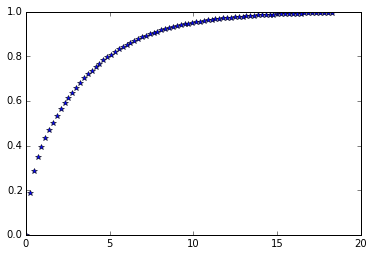

In [76]:
Bcp = sy.Poly(Bc, z)
Acp = sy.Poly(Ac,z)
a = []
for el in Acp.coeffs():
    a.append(float(sy.N(el)))
print a
b = []
for el in Bcp.coeffs():
    b.append(float(sy.N(el)))
print b

sys = cm.tf(b,a,np.log(2)/3.0)
print sys
Td = np.log(2)/3*np.arange(80)
(yd,td) = cm.step(sys, Td)
plt.plot(td,yd[0], '*')
plt.xlim([0,20])
plt.savefig("stepresponse.pdf")

[18.0, -27.0, 9.0]
[2.0, 2.0, -1.0, -2.0]


(-1, 1)

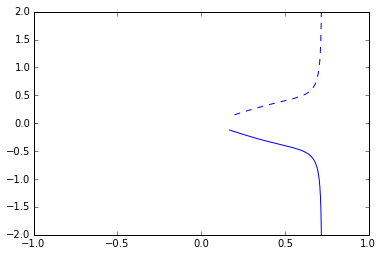

In [85]:
Bp = sy.Poly(B.subs(h, sy.log(2)/3))
Ap = sy.Poly(A.subs(h, sy.log(2)/3))
a = []
for el in Ap.coeffs():
    a.append(float(sy.N(el)))
print a
b = []
for el in Bp.coeffs():
    b.append(float(sy.N(el)))
print b

sys_o = cm.tf(b,a,np.log(2)/3.0)
cm.nyquist(sys_o, np.linspace(0,2*np.pi, 800))
plt.ylim(-2,2)
plt.xlim(-1,1)

In [108]:
H1 = cm.tf([1],[1, -2.2, 1.4, -0.2], 0.5)
H2 = cm.tf([1, 0],[1, -1.2, .2], 0.5)
H3 = cm.tf([4, 1],[1, 1, .16], 1)
H4 = cm.tf([0.25], [1, -1.5, 0.5])

(-2, 2)

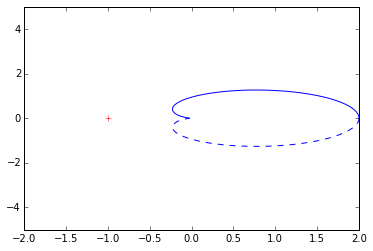

In [99]:
cm.nyquist(H4, np.linspace(0,2*np.pi, 800))
plt.ylim(-5,5)
plt.xlim(-2,2)

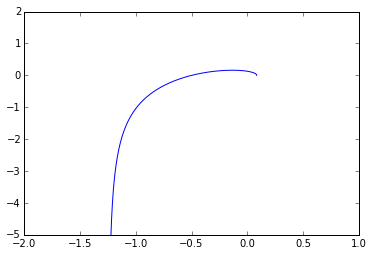

In [112]:
import khcontrol as khc

z = np.exp(1j*np.linspace(0,np.pi, 800))
zz = H4(z)
(zr,zi) = khc.nyq(H4, 800)

#nq = []
#for w in np.linspace(0,2*np.pi, 200):
#    #nq.append(H4(np.exp(1j*w)))
#    nq.append(H4(1j*w))
plt.figure()
plt.plot(np.real(zz), np.imag(zz))
plt.ylim(-5,2)
plt.xlim(-2,1)
xy = np.column_stack((np.real(zz),np.imag(zz)))
np.savetxt('nyquist150907.out', xy)


In [104]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [114]:
1600.0/3

533.3333333333334